In [2]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

# Current Comparator background spectra

We acquired spectra from channels 2, 6, 10 and 14 on the SIPHRA by connecting the two available probes, which output the sum of the signals at the SiPM channels 1 - 4 and 5 - 8, respectively. We present a comparison of the data thus acquired. In this part we used the charge comparator on the SIPHRA to trigger readout. Since the charge comparator threshold is global, the only parameter in which the configuration of the active channel and the inactive ones differed was the value of the parameter `enable_triggering`. All other parameters are reported in the following table:

<table>
    <tr>
        <th><div align="center"> Parameter </div></th>
        <th><div align="center"> Value </div></th>
    </tr>
    <tr>
        <td><div align="left"> `cmis_detector_voffset` </div></td>
        <td> 127 </td>
    </tr>
    <tr>
        <td><div align="left"> `cmis_detector_ioffset` </div></td>
        <td> 7 </td>
    </tr>
    <tr>
        <td><div align="left"> `cc_threshold` </div></td>
        <td> 1 </td>
    </tr>
</table>

In [30]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260206/1_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset0_Background.csv'))
dfs.append(pd.read_csv('../data/260206/4_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset50_Background.csv'))
dfs.append(pd.read_csv('../data/260206/2_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset127_Background.csv'))
dfs.append(pd.read_csv('../data/260206/3_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset255_Background.csv'))

# dfs[0]

In [31]:
import matplotlib.pyplot as plt

BITS_12 = 2**12
N_BINS = 512

summed_spectra = [df['Ch2'].tolist() for df in dfs]

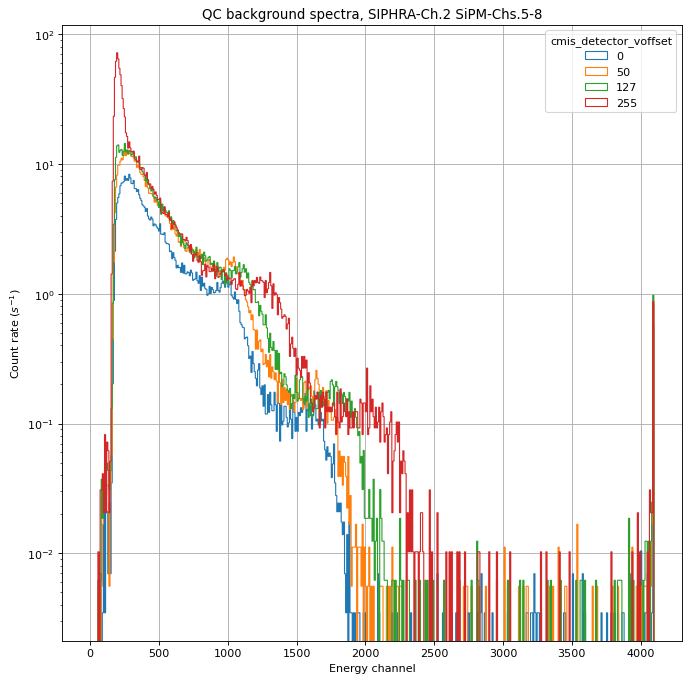

In [32]:
import numpy as np
times = [286.980, 179.172, 161.187, 97.309]
plt.figure(figsize=(10,10), dpi=80)
legend = ['0', '50', '127', '255']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend(title="cmis_detector_voffset")
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('QC background spectra, SIPHRA-Ch.2 SiPM-Chs.5-8')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

In [17]:
dfs_ch1_4 = []
dfs_ch1_4.append(pd.read_csv('../data/260204/5_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/6_SiPM_ChannelsTest_Ch1-4_Ch6_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/7_SiPM_ChannelsTest_Ch1-4_Ch10_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/8_SiPM_ChannelsTest_Ch1-4_Ch14_CT_Thr1_Background.csv'))

dfs_ch1_4 = dfs_ch1_4[::-1]
single_ch_spectra = [df[ch].tolist() for df, ch in zip(dfs_ch1_4, ['Ch14', 'Ch10', 'Ch6', 'Ch2'])]

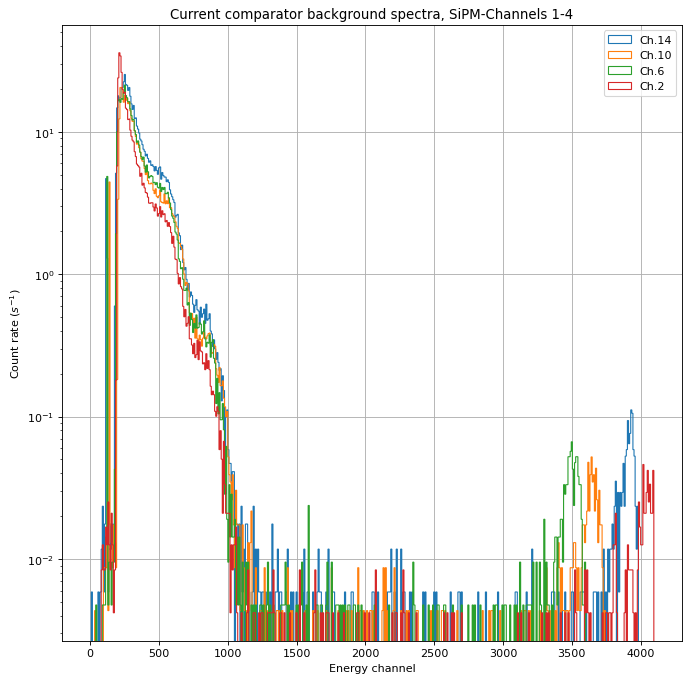

In [22]:
times_ch1_4 = [170.448, 230.292, 210.383, 238.595]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.14', 'Ch.10', 'Ch.6', 'Ch.2']
for idx,s in enumerate(single_ch_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Current comparator background spectra, SiPM-Channels 1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

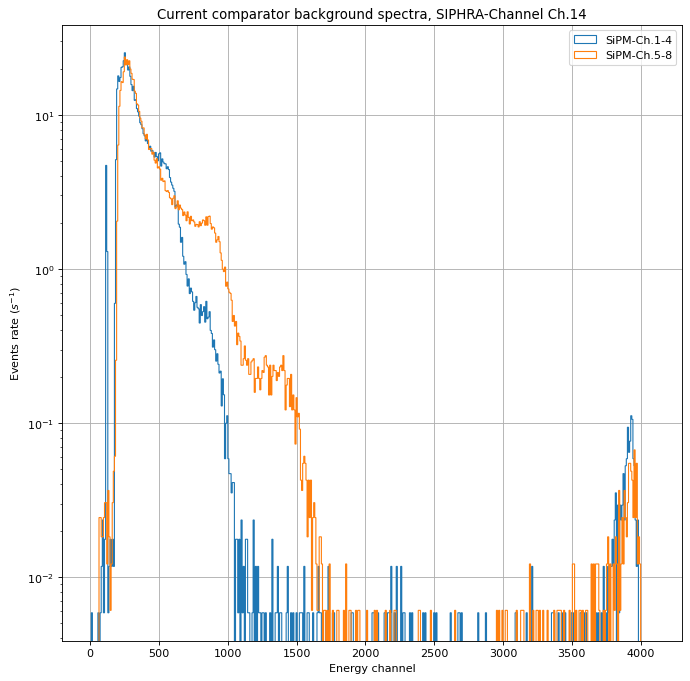

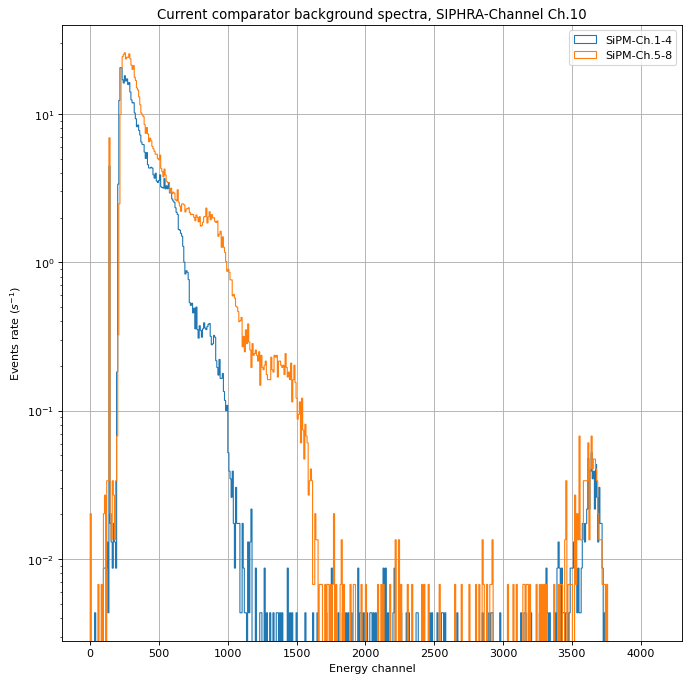

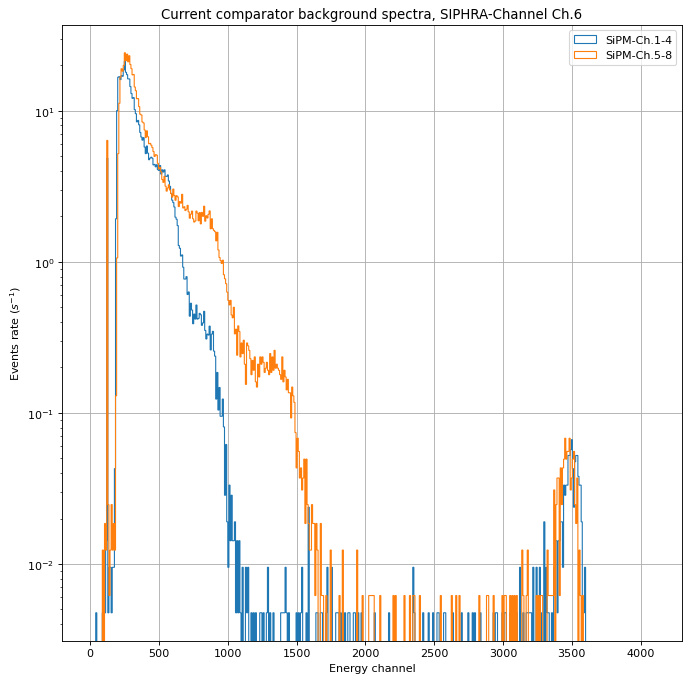

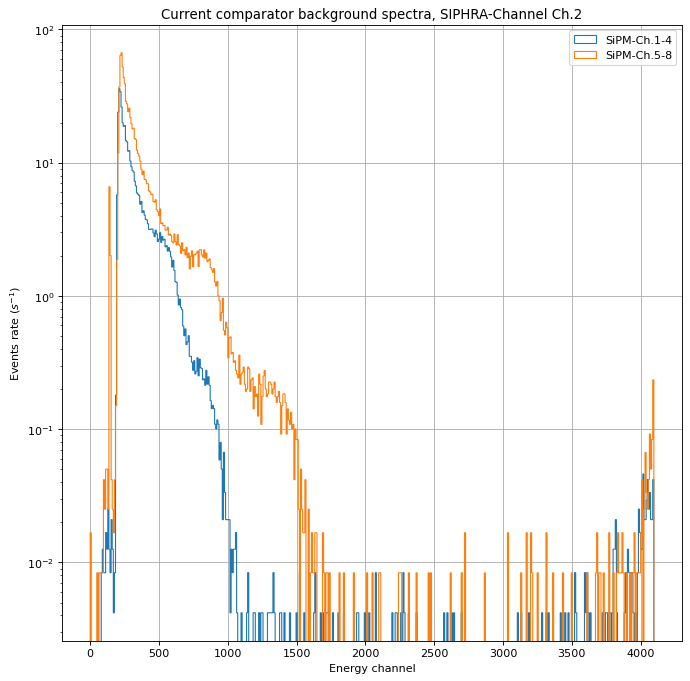

In [36]:
for idx, (spct1, spct2) in enumerate(zip(summed_spectra, single_ch_spectra)):
    plt.figure(figsize=(10,10), dpi=80)
    plt.hist(spct2, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(spct2), log=True, histtype='step', label='SiPM-Ch.1-4')
    plt.hist(spct1, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(spct1), log=True, histtype='step', label='SiPM-Ch.5-8')
    plt.legend()
    plt.xlabel(r'Energy channel')
    plt.ylabel(r'Count rate ($s^{-1}$)')
    plt.title('Current comparator background spectra, SIPHRA-Channel '+legend[idx])
    plt.xticks(np.arange(0,4500,500))
    plt.grid()
    plt.show()

# Charge Comparator background spectra

<table style="width:100%">
    <tr>
        <th rowspan="2"><div align="center"> Parameter </div></th>
        <th colspan="2"><div align="center"> Value </div></th>
    </tr>
    <tr>
        <th><div align="center"> Inactive channels </div></th>
        <th><div align="center"> Active channel </div></th>
    </tr>
    <tr>
        <td> ccmis_detector_voffset </td>
        <td colspan=2><div align="center"> 127 </div></td>
    </tr>
    <tr>
        <td> cmis_detector_ioffset </td>
        <td colspan=2><div align="center"> 7 </div></td>
    </tr>
    <tr>
        <td> cc_threshold </td>
        <td colspan=2><div align="center"> 1 </div></td>
</table>